Using score column: total
Class average (mean): 232.05555555555554
Found 5 students above the class average.

Top 3 students by total


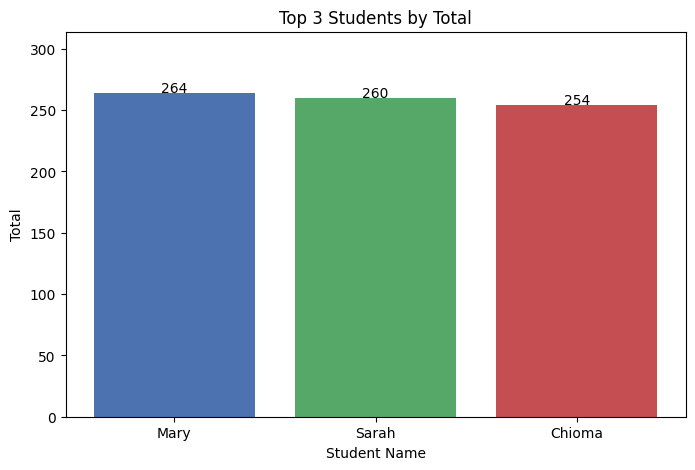

Saved above-average students to above_average.csv


In [3]:
# WEEK 3 project(data cleaning,analysis and charts)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('students_clean.csv')
# 1) detect which column to treat as the student's overall score (its adviceable to use this method for robust data)
# prefer 'total', then 'score', then 'average', otherwise sum numeric columns
score_col = None
if "total" in df.columns:
    score_col = "total"
elif "score" in df.columns:
    score_col = "score"
elif "average" in df.columns:
    score_col = "average"
else:
    # find numeric columns (ints/floats) and use them to create a total if needed
    numeric_cols = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c])]
    # if there are multiple numeric columns that look like subject scores, sum them
    if len(numeric_cols) >= 2:
        # exclude some likely non-score numeric columns if present (index/id)
        exclude = ["id", "student_id", "index"]
        subjects = [c for c in numeric_cols if c.lower() not in exclude]
        df["total"] = df[subjects].sum(axis=1)
        score_col = "total"
    elif numeric_cols:
        score_col = numeric_cols[0]
    else:
        raise ValueError("No numeric score column found. Please ensure you have 'total' or numeric subject columns.")

print("Using score column:", score_col)
# 2) compute the class (overall) average (mean)
class_average = df[score_col].mean()
print("Class average (mean):", class_average)
# 3) list students who scored above the class average
above_avg = df[df[score_col] > class_average].copy()   # .copy() so we can safely modify if needed
above_avg = above_avg.reset_index(drop=True)          # tidy index for display
print(f"Found {len(above_avg)} students above the class average.\n")
above_avg
# 4) find the top 3 students by the chosen score column
top3 = df.nlargest(3, score_col).reset_index(drop=True)
print("Top 3 students by", score_col)
top3[["name", score_col]]
# 5) plot a clear bar chart of the top 3
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
bars = plt.bar(top3["name"], top3[score_col], color=["#4c72b0", "#55a868", "#c44e52"])
plt.title(f"Top 3 Students by {score_col.title()}")
plt.ylabel(score_col.title())
plt.xlabel("Student Name")
plt.ylim(0, top3[score_col].max() + 50)   # give some headroom

# put value labels on top of each bar
for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, h + 0.5, f"{h:.0f}", ha="center")

plt.xticks(rotation=0)
plt.show()
# 6) save the above-average students to CSV
output_file = "above_average.csv"
above_avg.to_csv(output_file, index=False)
print("Saved above-average students to", output_file)